<h1 id="header">Automatized analysis of relationship between unemployment and GDP using Quandl API</h1>

This notebook shows how to automatize analysis of relationship between unemployment and GDP using Quandl API. 

In [3]:
from matplotlib import pyplot
import pandas as pd
import quandl
from datetime import date, timedelta
import numpy as np
from prettytable import PrettyTable

In [4]:
quandl.ApiConfig.api_key = 'Your key'       #Insert your quandl key here

In [9]:
start_date = (date.today()-timedelta(days=(365*10))).isoformat()      #I am using data of last 10 years

#The historcial analysis has to end last year, as current year numbers are already the first ones that are forecasted

end_date = (date.today()-timedelta(days=(365*1))).isoformat()         

#Data download

cz_unem_imf_forecast=quandl.get('ODA/CZE_LUR', start_date=start_date, end_date=end_date)
hu_unem_imf_forecast=quandl.get('ODA/HUN_LUR', start_date=start_date, end_date=end_date)
pl_unem_imf_forecast=quandl.get('ODA/POL_LUR', start_date=start_date, end_date=end_date)
sk_unem_imf_forecast=quandl.get('ODA/SVK_LUR', start_date=start_date, end_date=end_date)

#IMF reports data on early basis, for charting it is useful to convert index to yearly basis too

def to_datetime(time_series):
    time_series.index=pd.to_datetime(time_series.index).year
    
time_series_unem=[cz_unem_imf_forecast,sk_unem_imf_forecast,hu_unem_imf_forecast,pl_unem_imf_forecast]

for values in time_series_unem:
    to_datetime(values)


#Creating a DataFrame

df_unem = pd.DataFrame({
        'cz_unem':cz_unem_imf_forecast['Value'],
        'sk_unem':sk_unem_imf_forecast['Value'],
        'hu_unem':hu_unem_imf_forecast['Value'],
        'pl_unem':pl_unem_imf_forecast['Value']
        })


#Now lets do the same for GDP 

cz_gdp_imf_forecast=quandl.get('ODA/CZE_NGDP_RPCH', start_date=start_date, end_date=end_date)
hu_gdp_imf_forecast=quandl.get('ODA/HUN_NGDP_RPCH', start_date=start_date, end_date=end_date)
pl_gdp_imf_forecast=quandl.get('ODA/POL_NGDP_RPCH', start_date=start_date, end_date=end_date)
sk_gdp_imf_forecast=quandl.get('ODA/SVK_NGDP_RPCH', start_date=start_date, end_date=end_date)

time_series_gdp=[cz_gdp_imf_forecast,sk_gdp_imf_forecast,hu_gdp_imf_forecast,pl_gdp_imf_forecast]

for values in time_series_gdp:
    to_datetime(values)

df_gdp = pd.DataFrame({
        'cz_gdp':cz_gdp_imf_forecast['Value'],
        'sk_gdp':sk_gdp_imf_forecast['Value'],
        'hu_gdp':hu_gdp_imf_forecast['Value'],
        'pl_gdp':pl_gdp_imf_forecast['Value']
        })

In [10]:
#This part is estimating linear regression coeffiecients to get the relationship between unemployment and GDP growth
#As a result, m is the marginal effect and b is integer

m_cz, b_cz = np.polyfit(df_gdp['cz_gdp'], df_unem['cz_unem'], 1)
m_sk, b_sk = np.polyfit(df_gdp['sk_gdp'], df_unem['sk_unem'], 1)
m_hu, b_hu = np.polyfit(df_gdp['hu_gdp'], df_unem['hu_unem'], 1)
m_pl, b_pl = np.polyfit(df_gdp['pl_gdp'], df_unem['pl_unem'], 1)

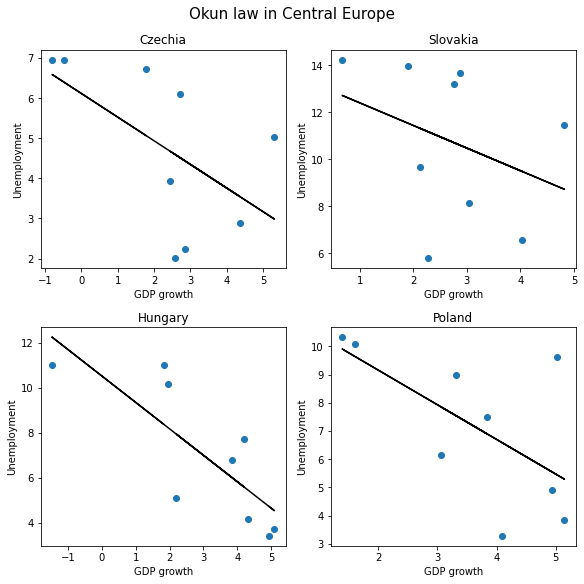

In [11]:
#This part is making charts 
#The charts are made as subplots for easier positioning

fig, (axs) = pyplot.subplots(2, 2,figsize=(8,8),constrained_layout=True)
fig.suptitle("Okun law in Central Europe",fontsize=15)
axs[0, 0].scatter(df_gdp['cz_gdp'], df_unem['cz_unem'], marker='o')
axs[0, 0].plot(df_gdp['cz_gdp'], m_cz*df_gdp['cz_gdp'] + b_cz,color="black")
axs[0, 0].set_title('Czechia')
axs[0, 0].set_ylabel('Unemployment')
axs[0, 0].set_xlabel('GDP growth')
axs[0, 1].scatter(df_gdp['sk_gdp'], df_unem['sk_unem'], marker='o')
axs[0, 1].plot(df_gdp['sk_gdp'], m_sk*df_gdp['sk_gdp'] + b_sk,color="black")
axs[0, 1].set_title('Slovakia')
axs[0, 1].set_ylabel('Unemployment')
axs[0, 1].set_xlabel('GDP growth')
axs[1, 0].scatter(df_gdp['hu_gdp'], df_unem['hu_unem'], marker='o')
axs[1, 0].plot(df_gdp['hu_gdp'], m_hu*df_gdp['hu_gdp'] + b_hu,color="black")
axs[1, 0].set_title('Hungary')
axs[1, 0].set_ylabel('Unemployment')
axs[1, 0].set_xlabel('GDP growth')
axs[1, 1].scatter(df_gdp['pl_gdp'], df_unem['pl_unem'], marker='o')
axs[1, 1].plot(df_gdp['pl_gdp'], m_pl*df_gdp['pl_gdp'] + b_pl,color="black")
axs[1, 1].set_title('Poland')
axs[1, 1].set_ylabel('Unemployment')
axs[1, 1].set_xlabel('GDP growth')
pyplot.show()

In [12]:
marginal_impact = PrettyTable()

marginal_impact_cz=round(m_cz, 2)
marginal_impact_sk=round(m_sk, 2)
marginal_impact_hu=round(m_hu, 2)
marginal_impact_pl=round(m_pl, 2)

marginal_impact.field_names = ["Country: ","Czechia","Slovakia","Hungary","Poland"]
marginal_impact.add_row(["Marginal impact to Y of change in U: "
                         ,marginal_impact_cz,marginal_impact_sk,marginal_impact_hu,marginal_impact_pl])

print(marginal_impact)

+---------------------------------------+---------+----------+---------+--------+
|               Country:                | Czechia | Slovakia | Hungary | Poland |
+---------------------------------------+---------+----------+---------+--------+
| Marginal impact to Y of change in U:  |  -0.59  |  -0.96   |  -1.18  | -1.23  |
+---------------------------------------+---------+----------+---------+--------+


This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services. Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, author has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, freely availible at the time of publication. Author makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.